<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/lab54_word_vector_rev101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word Embedding
- express words using vectors
- vectors are trained

# Word2Vec - 한국어

- 지금까지의 텍스트 코딩 방식인 One-hot encoding, BoW(단어모음)-문서-단어 행렬 방식은 모두 단어마다 고유번호를 배정하여 사용하지만, 이 번호들에는 아무런 의미가 포함되어 있지 않고 단지 인덱스 역할만 함.
- Word Vector 에서는 
 - 단어를 고차원 공간상의 벡터로 표현함으로 단어간 거리 표현 가능. 차원이 높을수록 정교한 의미 구분 가능.
 - 보통 50~300 개 정도의 차원을 사용함
 - 단어간의 거리 (유사도) 뿐 아니라 방향성(벡터)도 찾을 수 있음.
 - 단어벡터의 각 성분이 어떤 의미를 갖는지는 알 수 없다.

- 빅카인즈 뉴스기사 데이터 활용(https://www.bigkinds.or.kr/)

## 뉴스를 이용한 단어 벡터 생성
- 단어 추출: konlpy 의 kkma() 사용
- 단어 벡터 생성: gensim 의 word2vec() 사용

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.1 MB/s 
     |████████████████████████████████| 465 kB 65.2 MB/s 


In [ ]:
from konlpy.tag import Kkma     # 형태소 분석 및 자연어 처리 모듈 (서울대)
from gensim.models.word2vec import Word2Vec

In [ ]:
# IT 뉴스기사를 이용한다
!wget https://bit.ly/2X7UON2 -O news2018.xlsx

--2022-11-13 02:06:58--  https://bit.ly/2X7UON2
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2022-11-13 02:06:58--  https://www.dropbox.com/s/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6026:18::a27d:4612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx [following]
--2022-11-13 02:06:59--  https://www.dropbox.com/s/raw/gr5jhlshp8m3iqn/NewsResult_20181128-20190228.xlsx
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc06f6fb51fd60236f2b99a1f179.dl.dropboxuserco

In [ ]:
import pandas as pd
news = pd.read_excel("news2018.xlsx")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
news.head(2)

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출,본문,URL,분석제외 여부
0,1.500401e+06,20190228,국제신문,김태경 기자 tgkim@kookje.co.kr,빅딜이냐 스몰딜이냐 ‘영변 핵+α’ 로드맵 도출이 관건,정치>북한,정치>외교,NaN,NaN,NaN,NaN,"김,도널드 트럼프,김의겸,김정은","북미,미국,하노이,서울,싱가포르,북한,리비아","북미,북미 정상회,미국,청와대,북미 정상회담,북한,국무위","빅딜,스몰딜,영변,로드맵,도출,비핵화,수준,상응,조치,막판,양국,협상팀,밀당,1차,...","북미,비핵화,미국,스몰딜,1차,정상회담,김정은,종전선언,연락사무소,하노이,영변,대변...",- 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...,http://www.kookje.co.kr/news2011/asp/newsbody....,NaN
1,1.200201e+06,20190228,경인일보,조영상,"하노이 도착후 실무대표단 청취 김정은, 북미회담 성공 '잰걸음'",국제>국제일반,정치>북한,NaN,NaN,NaN,NaN,김,"북미,하노이,베트남","조선중앙통신,국무위","하노이,도착,실무대표단,청취,김정은,잰걸음,북미회담,성공,김정은,국무,위원장,시작,...","실무대표단,하노이,김정은,위원장,베트남,북미정상회담,북미회담,정상회담,조선중앙통신,...",김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...,http://www.kyeongin.com/main/view.php?key=2019...,NaN


In [ ]:
news["본문"][:4]

0    - 비핵화 수준 상응 조치 놓고\n- 양국 협상팀 막판까지 ‘밀당’\n- 1차 때와...
1    김정은 국무위원장이 27일 시작되는 제2차 북미정상회담 성공을 위해 심혈을 기울이고...
2    북미가 처음으로 정상 간 단독회담과 만찬을 가지며 또다시 새로운 역사 창조에 나섰다...
3    지난해 9월 남북정상회담 당시 리선권 북한 조국평화통일위원장의 '냉면' 발언으로 정...
Name: 본문, dtype: object

In [ ]:
kkma = Kkma()

In [ ]:
sentence_list = []
for sent in news["본문"]:
    
    sent_kkma_pos = kkma.nouns(sent)   # 명사만 추출
    word_list = []
    for word_pos in sent_kkma_pos:
        word_list.append(word_pos)

    sentence_list.append(word_list)

In [ ]:
sentence_list[0]

['비핵화',
 '수준',
 '상응',
 '조치',
 '양국',
 '협상',
 '협상팀',
 '팀',
 '막판',
 '당',
 '1',
 '1차',
 '차',
 '때',
 '시간',
 '조율',
 '단계적',
 '접근',
 '동의',
 '예상',
 '종전',
 '종전선언',
 '선언',
 '연락',
 '연락사무소',
 '사무소',
 '개설',
 '등',
 '조건',
 '조건부',
 '부',
 '제재',
 '완화',
 '명시',
 '가능성',
 '북미',
 '북미회담',
 '회담',
 '빅딜',
 '성공',
 '김',
 '김정은',
 '정은',
 '답방',
 '결과',
 '연관',
 '북한',
 '국무',
 '국무위원장',
 '위원장',
 '도',
 '도널드',
 '널드',
 '트럼프',
 '미국',
 '대통령',
 '27',
 '27일',
 '일',
 '친교',
 '만찬']

In [ ]:
for i in range(3):
    print(sentence_list[i])

['비핵화', '수준', '상응', '조치', '양국', '협상', '협상팀', '팀', '막판', '당', '1', '1차', '차', '때', '시간', '조율', '단계적', '접근', '동의', '예상', '종전', '종전선언', '선언', '연락', '연락사무소', '사무소', '개설', '등', '조건', '조건부', '부', '제재', '완화', '명시', '가능성', '북미', '북미회담', '회담', '빅딜', '성공', '김', '김정은', '정은', '답방', '결과', '연관', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼프', '미국', '대통령', '27', '27일', '일', '친교', '만찬']
['김', '김정은', '정은', '국무', '국무위원장', '위원장', '27', '27일', '일', '시작', '저', '2', '2차', '차', '북미', '북미정상회담', '정상', '회담', '성공', '심혈', '조선', '조선중앙통신', '중앙', '통신', '이날', '26', '26일', '하노이', '도착', '리', '호텔', '실무', '실무대표단', '대표단', '보고', '조미', '수뇌', '수뇌회담', '성공적', '보장', '나라', '현지', '파견', '사이', '접촉', '정형', '결과', '을', '구체적', '청취']
['북미', '처음', '정상', '간', '단독', '단독회담', '회담', '만찬', '역사', '창조', '결', '물', '도출', '북측', '영', '영변', '변', '핵', '핵시설', '시설', '폐기', '외', '추가', '추가적인', '적인', '비핵화', '조치', '미국', '금강산', '금강산관광', '관광', '등', '경제적', '체제', '체제보장', '보장', '여부', '양', '간', '톱', '담판', '김', '북한', '국무', '국무위원장', '위원장', '도', '도널드', '널드', '트럼

In [ ]:
news.shape, len(sentence_list)

((1543, 19), 1543)

In [ ]:
[len(w) for w in sentence_list][:10]

[61, 50, 63, 48, 44, 38, 38, 60, 52, 39]

In [ ]:
model = Word2Vec(sentence_list, sg=1, size=100)   #sg=1 (skip-gram), 0(CBOW)

In [ ]:
model["대한민국"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.05730817, -0.159837  ,  0.18002316, -0.04443344, -0.00976908,
       -0.04341607, -0.10145577,  0.06696144, -0.11806884, -0.12188727,
       -0.01323062,  0.10443621,  0.18731314, -0.00563357, -0.03458427,
       -0.00793294,  0.06957003, -0.116082  ,  0.01975978, -0.2465943 ,
        0.05424855, -0.01611571, -0.0093081 , -0.12582734,  0.00621971,
        0.16238256, -0.0572758 ,  0.08641807, -0.04467731,  0.14555092,
       -0.19077726,  0.02592782,  0.04940794,  0.06057519,  0.06990304,
       -0.02007191,  0.03322614,  0.02972248, -0.06037333,  0.05501138,
        0.16841283, -0.2173892 ,  0.0468287 ,  0.02512313,  0.26008323,
        0.2983911 , -0.06604782,  0.1166904 , -0.09862941,  0.05449785,
       -0.09423325,  0.0823935 , -0.1571855 ,  0.02151907,  0.02125412,
        0.17391405, -0.00845051, -0.15499632,  0.01447772,  0.00576876,
        0.17913313, -0.05758148,  0.1309215 ,  0.01140663,  0.08691087,
        0.10243927,  0.03799856,  0.02477174,  0.03322697, -0.23

In [ ]:
model.wv['대한민국']

array([-0.05730817, -0.159837  ,  0.18002316, -0.04443344, -0.00976908,
       -0.04341607, -0.10145577,  0.06696144, -0.11806884, -0.12188727,
       -0.01323062,  0.10443621,  0.18731314, -0.00563357, -0.03458427,
       -0.00793294,  0.06957003, -0.116082  ,  0.01975978, -0.2465943 ,
        0.05424855, -0.01611571, -0.0093081 , -0.12582734,  0.00621971,
        0.16238256, -0.0572758 ,  0.08641807, -0.04467731,  0.14555092,
       -0.19077726,  0.02592782,  0.04940794,  0.06057519,  0.06990304,
       -0.02007191,  0.03322614,  0.02972248, -0.06037333,  0.05501138,
        0.16841283, -0.2173892 ,  0.0468287 ,  0.02512313,  0.26008323,
        0.2983911 , -0.06604782,  0.1166904 , -0.09862941,  0.05449785,
       -0.09423325,  0.0823935 , -0.1571855 ,  0.02151907,  0.02125412,
        0.17391405, -0.00845051, -0.15499632,  0.01447772,  0.00576876,
        0.17913313, -0.05758148,  0.1309215 ,  0.01140663,  0.08691087,
        0.10243927,  0.03799856,  0.02477174,  0.03322697, -0.23

In [ ]:
for index, word in enumerate(model.wv.index2word):
    if index == 10:
        break
    print(f"word {index}/{len(model.wv.index2word)} is {word}")

word 0/1956 is 회담
word 1/1956 is 일
word 2/1956 is 북미
word 3/1956 is 차
word 4/1956 is 2
word 5/1956 is 정상
word 6/1956 is 2차
word 7/1956 is 김
word 8/1956 is 북한
word 9/1956 is 미국


In [ ]:
print(model.wv.most_similar("대한민국"))

[('민국', 0.9981762766838074), ('국내증시', 0.9970000982284546), ('대한', 0.9965223073959351), ('상대', 0.996268093585968), ('혁명', 0.9960501790046692), ('투자자', 0.9960286617279053), ('기념식', 0.995365560054779), ('단체', 0.9952832460403442), ('증권', 0.9943686723709106), ('조성길', 0.9942375421524048)]


In [ ]:
print(model.wv.similarity("한국","미국"))
print(model.wv.similarity("한국","일본"))
print(model.wv.similarity("미국","일본"))

0.19942841
0.5103363
0.6725728


In [ ]:
# storing and loading the model
model.save('tmp_word2vec.model')
model = Word2Vec.load("tmp_word2vec.model")

In [ ]:
# a:b = c: ? 
model.wv.most_similar(positive=['한국', '미국'], negative=['서울'])

[('핵', 0.6372560262680054),
 ('행정부', 0.6176495552062988),
 ('ㆍ', 0.5901193618774414),
 ('널드', 0.5843161940574646),
 ('최종', 0.5813090801239014),
 ('도', 0.5801754593849182),
 ('대로', 0.5783638954162598),
 ('아베', 0.5762561559677124),
 ('세기', 0.5747398138046265),
 ('도널드', 0.5726562738418579)]

## Keras 에서 word2vec 훈련된 모델 사용하기 (그림형제 동화 예제)

In [ ]:
import requests
import re
res = requests.get('https://www.gutenberg.org/files/2591/2591-0.txt') 
grimm = res.text[2801:530661]    # 그림형제의 동화 일부만 사용
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm)
sentences = grimm.split('. ')  # 문장 단위로 자름
data = [s.lower().split() for s in sentences]

In [ ]:
len(data)  # number of sentences

3468

In [ ]:
print(data[:2])

[['second', 'story', 'the', 'salad', 'the', 'story', 'of', 'the', 'youth', 'who', 'went', 'forth', 'to', 'learn', 'what', 'fear', 'was', 'king', 'grisly', 'beard', 'iron', 'hans', 'cat', 'skin', 'snow', 'white', 'and', 'rose', 'red', 'the', 'brothers', 'grimm', 'fairy', 'tales', 'the', 'golden', 'bird', 'a', 'certain', 'king', 'had', 'a', 'beautiful', 'garden', 'and', 'in', 'the', 'garden', 'stood', 'a', 'tree', 'which', 'bore', 'golden', 'apples'], ['these', 'apples', 'were', 'always', 'counted', 'and', 'about', 'the', 'time', 'when', 'they', 'began', 'to', 'grow', 'ripe', 'it', 'was', 'found', 'that', 'every', 'night', 'one', 'of', 'them', 'was', 'gone']]


In [ ]:
len(data), [len(data[i]) for i in range(10)]

(3468, [55, 26, 19, 26, 23, 41, 48, 21, 18, 32])

In [ ]:
model = Word2Vec(data,         # 리스트 형태의 데이터
                 sg=1,         # 0: CBOW, 1: Skip-gram
                 size=100,     # 벡터 크기
                 window=3,     # 고려할 앞뒤 폭(앞뒤 3단어)
                 min_count=3,  # 사용할 단어의 최소 빈도(3회 이하 단어 무시)
                 workers=4)    # 동시에 처리할 작업 수(코어 수와 비슷하게 설정)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [ ]:
model.wv.vectors.shape

(2278, 100)

In [ ]:
NUM_WORDS, EMB_DIM = model.wv.vectors.shape

emb = Embedding(input_dim=NUM_WORDS, output_dim=EMB_DIM,
                trainable=False, weights=[model.wv.vectors])   # pre-trained weights
keras_model = Sequential()
keras_model.add(emb)
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         227800    
Total params: 227,800
Trainable params: 0
Non-trainable params: 227,800
_________________________________________________________________


In [ ]:
i = model.wv.index2word.index('princess'); i

150

In [ ]:
keras_model(i)

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([ 0.17783275, -0.08774558,  0.09323502, -0.07242519,  0.20657292,
        0.03197189,  0.16224365, -0.15539818,  0.01945902,  0.09025002,
        0.17573437, -0.06973731,  0.11954256,  0.01534615, -0.37158963,
       -0.02288678,  0.01575112,  0.05553897,  0.17502707, -0.08478002,
       -0.21321169, -0.02501886, -0.27250507,  0.11078458, -0.21503918,
        0.27691916,  0.08938914, -0.08242173, -0.11613622, -0.20222554,
        0.04449013, -0.2559901 , -0.03157396,  0.0605896 , -0.15382041,
       -0.32093048, -0.04655121, -0.11977814,  0.04055993,  0.05245483,
        0.06287044,  0.09412678, -0.08609053, -0.13557422,  0.17934753,
       -0.09852032,  0.19760892, -0.006117  , -0.18912947, -0.09823273,
        0.1347044 ,  0.09133997, -0.06159864,  0.19485788,  0.04612151,
        0.31897318, -0.05191209, -0.06640887,  0.16498116,  0.144308  ,
       -0.30118912,  0.03162405, -0.04633264,  0.0622423 , -0.43333298,
       -0.018075

In [ ]:
keras_model(i) == keras_model.predict([i])

<tf.Tensor: shape=(1, 1, 100), dtype=bool, numpy=
array([[[ True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True,  True,  True,  True,  True,  True,  True,  True,  True,
          True]]])>

In [ ]:
model['princess'] == keras_model(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


<tf.Tensor: shape=(100,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])>

## Keras 에서 직접 Word2Vec 훈련도 가능
- http://doc.mindscale.kr/km/unstructured/11.html

## NLTK 이용한 문장의 유사도
- NLTK (Natural Language ToolKit) 라이브러리 사용

In [ ]:
!pip install nltk

In [ ]:
# simple exercise
import nltk
nltk.download('punkt')
sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good."
tokens = nltk.word_tokenize(sentence)
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

In [ ]:
nltk.download('averaged_perceptron_tagger')
tagged = nltk.pos_tag(tokens)
tagged[0:6]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN')]

In [ ]:
# edit_distance: 문자열이 얼마나 다른지 편집거리를 이용해 유사도 판단
sentence_list = ["우리 모두 함께 놀자", "모두 같이 놀자", "놀자", "모두 다 같이"]

for i in sentence_list:
    print("'", i, "'")
    for j in sentence_list:
        print("\t", j, " : ", end='')
        print(nltk.edit_distance(i, j), )
    print()

' 우리 모두 함께 놀자 '
	 우리 모두 함께 놀자  : 0
	 모두 같이 놀자  : 5
	 놀자  : 9
	 모두 다 같이  : 7

' 모두 같이 놀자 '
	 우리 모두 함께 놀자  : 5
	 모두 같이 놀자  : 0
	 놀자  : 6
	 모두 다 같이  : 4

' 놀자 '
	 우리 모두 함께 놀자  : 9
	 모두 같이 놀자  : 6
	 놀자  : 0
	 모두 다 같이  : 7

' 모두 다 같이 '
	 우리 모두 함께 놀자  : 7
	 모두 같이 놀자  : 4
	 놀자  : 7
	 모두 다 같이  : 0



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
 
sentence_list = ['우리 모두 함께 놀자','모두 같이 놀자']
 
tfidf = TfidfVectorizer()
tfidf_vec = tfidf.fit_transform(sentence_list)

count = CountVectorizer()
count_vec = count.fit_transform(sentence_list)

In [ ]:
tfidf_vec[0].toarray()

array([[0.        , 0.40993715, 0.40993715, 0.57615236, 0.57615236]])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

tfidf_cosine = cosine_similarity(tfidf_vec[0].toarray(), tfidf_vec[1].toarray())[0][0]
count_cosine = cosine_similarity(count_vec[0].toarray(), count_vec[1].toarray())[0][0]

print("tfidf consine similarity : ", tfidf_cosine)
print("countvectorizer consine similarity : ", count_cosine)

tfidf consine similarity :  0.4112070550676187
countvectorizer consine similarity :  0.5773502691896258


In [ ]:
# 직접 구현시 코사인 유사도
import numpy as np
def my_cosine_similarity(x, y):  # x, y arrays
    return np.sum(x*y) / np.sqrt((np.sum(x**2)*np.sum(y**2)))

my_tfidf = my_cosine_similarity(tfidf_vec.toarray()[0], tfidf_vec.toarray()[1])
my_count = my_cosine_similarity(count_vec.toarray()[0], count_vec.toarray()[1])

print("my tfidf consine similarity : ", my_tfidf)
print("my countvectorizer consine similarity : ", my_count)

my tfidf consine similarity :  0.4112070550676187
my countvectorizer consine similarity :  0.5773502691896258


In [ ]:
# Jaccard similarity
sentence_list = ['우리 모두 함께 놀자','모두 같이 놀자']
def get_jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

get_jaccard_sim(sentence_list[0], sentence_list[1])

0.4

# Word2Vec - English
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

In [ ]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			 ['this', 'is', 'the', 'second', 'sentence'],
			 ['yet', 'another', 'sentence'],
		 	 ['one', 'more', 'sentence'],
			 ['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1, size=5)
# summarize the loaded model
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [ ]:
# summarize vocabulary (to see learned vocabulary of tokens (words) )
words = list(model.wv.vocab)
print(words)

['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [ ]:
# access vector for one word
print(model['sentence'])

[ 0.00327295 -0.07804104  0.07191536  0.03635828 -0.06252441]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=5, alpha=0.025)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


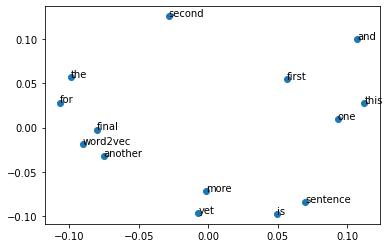

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [ ]:
# you can continue training it later
model.train([["hello", "world"]], total_examples=1, epochs=1)

(0, 2)

# Using pre-trained Word2Vec model
- GoogleNews-vectors-negative300.bin
- Korean version "ko.vec" available

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

- Its size is too big (bigger than 1.6 GB) and downloading may not be possible.

In [ ]:
!wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-11-12 12:32:28--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.228.192
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.228.192|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-11-12 12:32:28 ERROR 404: Not Found.



In [ ]:
!ls -l 

total 12
-rw-r--r-- 1 root root 7188 Nov 12 12:30 model.bin
drwxr-xr-x 1 root root 4096 Nov 10 14:30 sample_data


In [ ]:
EMBEDDING_FILE = './GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

FileNotFoundError: ignored

In [ ]:
word_vectors.vectors.shape

In [ ]:
v_apple = word_vectors["apple"] 
v_mango = word_vectors["mango"]
print(v_apple.shape)
print(v_mango.shape)
cosine_similarity([v_mango],[v_apple])

In [ ]:
word_vectors.most_similar(["apple"]), word_vectors.most_similar("tiger")

- king - man + woman

In [ ]:
word_vectors.most_similar(positive=["king","Woman"], negative=["man"])

In [ ]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = word_vectors[words]
mat.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

- Pre-trained Word2Vec
  - for english: (about 3 GB, and takes long to download): https://code.google.com/archive/p/word2vec 
  - word vectors of 30+ languages: https://github.com/Kyubyong/wordvectors

# Glove - pretrained word embedder

In [1]:
import gensim.downloader as api

glove_model = api.load('glove-twitter-25')
sample_glove_embedding=glove_model['computer']

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
sample_glove_embedding

array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [ ]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = glove_model[words]
mat.shape

(22, 25)

In [ ]:
import matplotlib.pyplot as plt

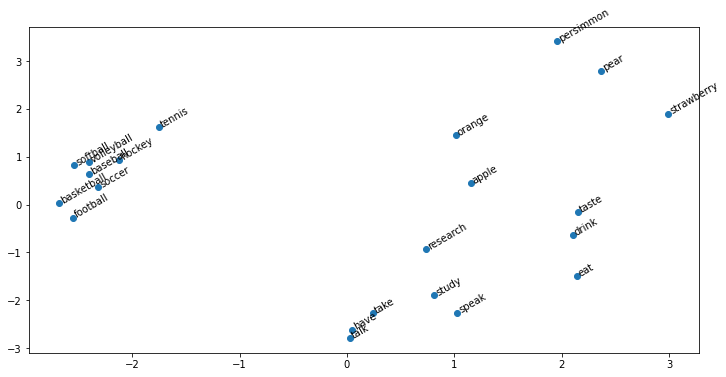

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

# difference between Glove and Word2Vec
- Both word2vec and glove enable us to represent a word in the form of a vector (often called embedding). They are the two most popular algorithms for word embeddings that bring out the semantic similarity of words that captures different facets of the meaning of a word.
- Word2vec embeddings are based on training a shallow feedforward neural network while glove embeddings are learnt based on matrix factorization techniques.
- Glove model is based on leveraging global word to word co-occurance counts leveraging the entire corpus. Word2vec on the other hand leverages co-occurance within local context (neighbouring words).
- In practice, however, both these models give similar results for many tasks. ​_Factors such as the dataset on which these models are trained, length of the vectors and so on seem to have a bigger impact than the models themselves. For instance, if I am using these models to derive  the features for a medical application, I can significantly improve performance by training on dataset from the medical domain.

# Doc2Vec
- extension of Word2Vec 
- https://lovit.github.io/nlp/representation/2018/03/26/word_doc_embedding/
- doc2vec을 만드는 과정에서 word2vec 모델이 필요하므로 필연적으로 word2vec도 생성

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = ["I love machine learning. Its awesome.",
        "I love coding in python",
        "I love building chatbots",
        "they chat amagingly well"]

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [ ]:
tagged_data

[TaggedDocument(words=['i', 'love', 'machine', 'learning', '.', 'its', 'awesome', '.'], tags=['0']),
 TaggedDocument(words=['i', 'love', 'coding', 'in', 'python'], tags=['1']),
 TaggedDocument(words=['i', 'love', 'building', 'chatbots'], tags=['2']),
 TaggedDocument(words=['they', 'chat', 'amagingly', 'well'], tags=['3'])]

In [ ]:
max_epochs = 100
vec_size = 5
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)    # dm=1:preserves word order, 0: do not preserve order
  
model.build_vocab(tagged_data)   # build a vocabulary

In [ ]:
model.corpus_count, model.epochs

(4, 5)

In [ ]:
for epoch in range(max_epochs):
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    
    model.alpha -= 0.0002           # decrease the learning rate
    model.min_alpha = model.alpha   # fix the learning rate, no decay

model.save("d2v.model")

In [ ]:
model= Doc2Vec.load("d2v.model")

In [ ]:
# to infer a new document vector
test_data = word_tokenize("I love chatbots".lower())
new_v = model.infer_vector(test_data)
print(test_data)
print("new vector inferred: ", new_v)

['i', 'love', 'chatbots']
new vector inferred:  [ 0.01396792 -0.05454361 -0.02515426 -0.01292989  0.08035586]


In [ ]:
model.wv.similar_by_vector(new_v)

[('learning', 0.6110128164291382),
 ('i', 0.4977003037929535),
 ('chatbots', 0.49657201766967773),
 ('awesome', 0.4905376136302948),
 ('python', 0.4758186936378479),
 ('coding', 0.4456605315208435),
 ('machine', 0.44097959995269775),
 ('love', 0.42535585165023804),
 ('amagingly', 0.41589418053627014),
 ('.', 0.35317036509513855)]

In [ ]:
# to find most similar doc using tags (it uses word-vectors.)
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

[('2', 0.9945580959320068), ('3', 0.9797182083129883), ('0', 0.9787049889564514)]


In [ ]:
# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])

[ 0.35767773 -0.460677   -1.1795473  -0.5412806  -0.1262291 ]


# Exercise (연습)

### KKma() 연습

In [ ]:
# KoNLPy: 형태소 (뜻을 가진 최소 언어 단위) 분석
# kkma: Korean morpheme analyzer
# https://konlpy.org/ko/latest/morph/#pos-tagging-with-konlpy
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.sentences('네, 안녕하세요. 반갑습니다.'))
print(kkma.nouns('질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요.'))
print(kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^'))
# pos (part-of-speech): 품사 (명사, 동사, ...)

['네, 안녕하세요.', '반갑습니다.']
['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트래커']
[('오류', 'NNG'), ('보고', 'NNG'), ('는', 'JX'), ('실행', 'NNG'), ('환경', 'NNG'), (',', 'SP'), ('에러', 'NNG'), ('메세지', 'NNG'), ('와', 'JKM'), ('함께', 'MAG'), ('설명', 'NNG'), ('을', 'JKO'), ('최대한', 'NNG'), ('상세히', 'MAG'), ('!', 'SF'), ('^^', 'EMO')]
